<a href="https://colab.research.google.com/github/fxnnxc/Data_visualization/blob/master/2.%20%EC%A0%9C%EC%A3%BC%EC%8B%A0%EC%9A%A9%EC%B9%B4%EB%93%9CAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 제주신용카드 데이터 EDA 
# (Sample 2 만개 분석)

In [7]:
# 한글 설치
# 주의사항 : 설치 후 [ ctrl + M + . ] 으로 런타임 다시 시작해야 함. 
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm 
 
# 폰트 다운 받기
!apt -qq -y install fonts-nanum

# 폰트 설정하기 
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=path, size=10)
plt.rc('font', family='NanumBarunGothic') 
matplotlib.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [2]:
import pandas as pd
data = pd.read_csv("/content/drive/My Drive/Data/jeju_data_ver1/201901-202003.csv")

In [34]:
from scipy import stats
import numpy as np

df = data.sample(20000)
df = df[(np.abs(stats.zscore(df['AMT'])) < 0.2)]
df

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
1775010,201902,경기,부천시,중식 음식점업,서울,금천구,20s,1,1,9,215800,9
15461919,201910,경기,고양시 일산동구,한식 음식점업,충남,서산시,40s,1,3,5,624500,10
14210408,201909,경북,울릉군,과실 및 채소 소매업,경기,수원시 팔달구,50s,2,4,5,195000,6
20619210,202001,경기,성남시 분당구,버스 운송업,전남,순천시,30s,2,2,172,2566900,285
3214435,201903,강원,동해시,빵 및 과자류 소매업,강원,원주시,50s,2,4,3,45200,3
...,...,...,...,...,...,...,...,...,...,...,...,...
6128574,201904,세종,NaN,과실 및 채소 소매업,충북,청주시 흥덕구,40s,2,3,7,409850,19
22695368,202002,부산,남구,체인화 편의점,경남,거창군,20s,1,1,9,257400,36
20209268,201912,전북,고창군,체인화 편의점,충남,천안시 서북구,30s,2,2,13,137250,16
18118330,201911,서울,동작구,택시 운송업,경기,가평군,30s,1,2,111,2957050,298


## 1. Describe

* 지역과 상호명이 중복되는 부분이 많으며 string 타입이므로 Object에 대한 describe를 통해서 Unique한 개수를 확인합니다. 

In [30]:
df.describe(include=['O'])

,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE
count,18835,18777,18835,18835,18710,18835
unique,17,226,40,17,226,7
top,서울,중구,한식 음식점업,경기,서구,40s
freq,4757,858,2777,5122,517,4484


# 나이별 남성과 여성의 AMT(이용금액) 분포 


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


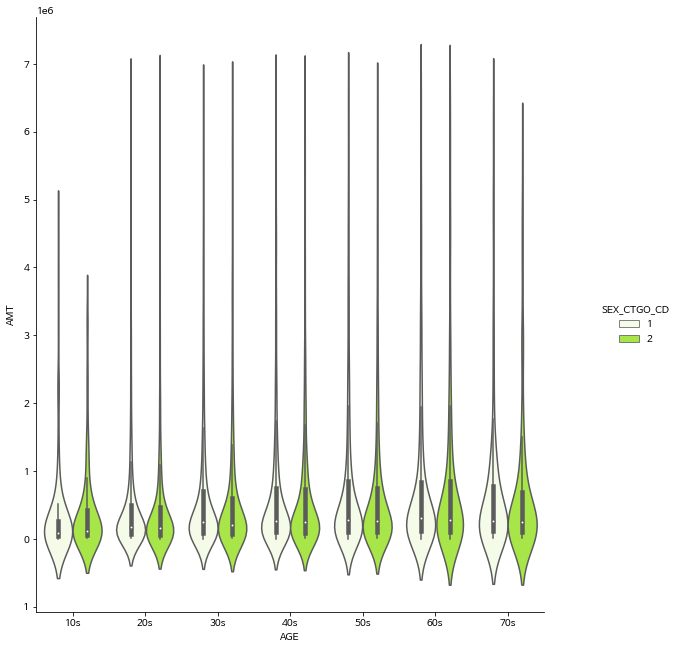

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.catplot('AGE', 'AMT', data=df, hue='SEX_CTGO_CD', order=[str(i)+'0s' for i in range(1,8)], kind='violin', color='greenyellow')
g.fig.set_size_inches(10,10)

# 지역별 AMT(이용금액) 분포

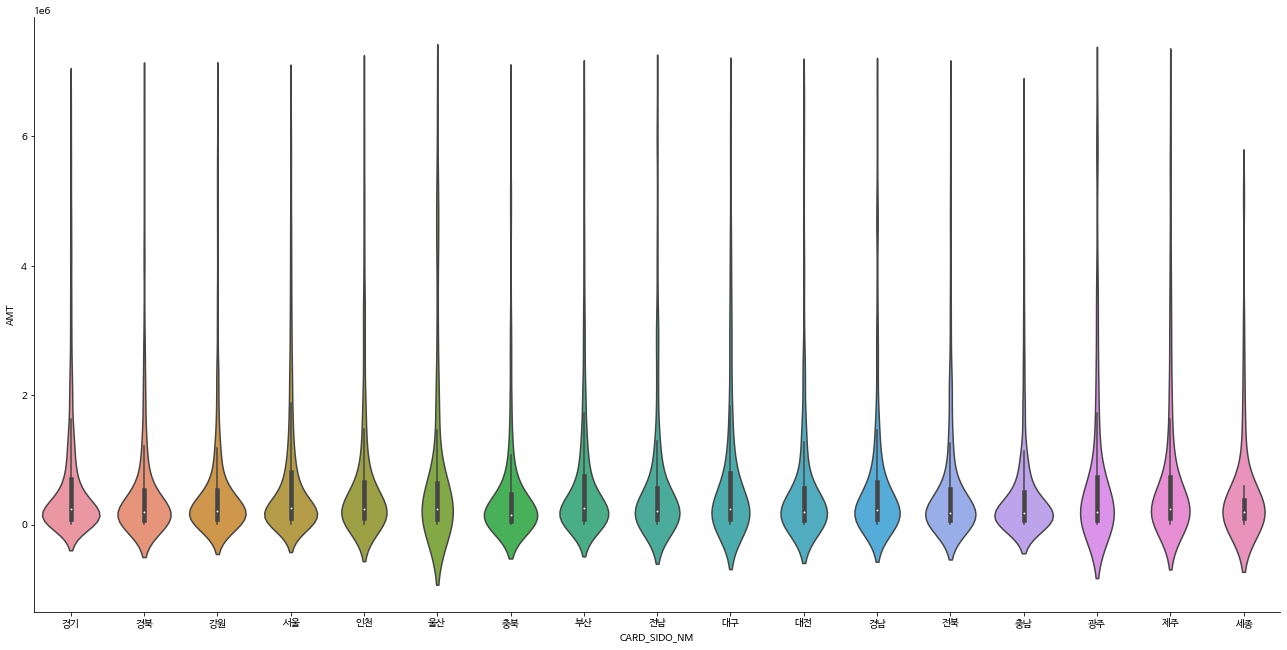

In [35]:
g = sns.catplot('CARD_SIDO_NM', 'AMT', data=df, kind='violin')
g.fig.set_size_inches(20,10)

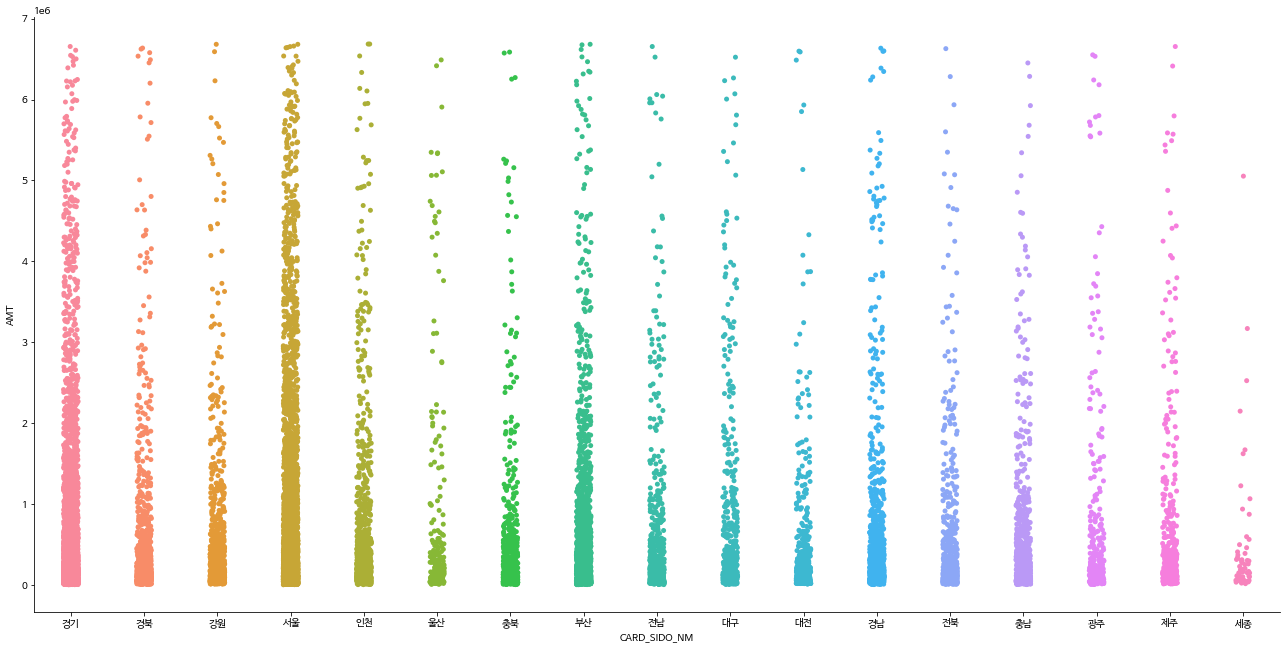

In [37]:
g = sns.catplot('CARD_SIDO_NM', 'AMT', data=df)
g.fig.set_size_inches(20,10)

In [44]:
df2  = data.groupby(['CARD_SIDO_NM', 'REG_YYMM']).sum()
df2 = df2['AMT']

# 지역 별 월 이용금액 변화

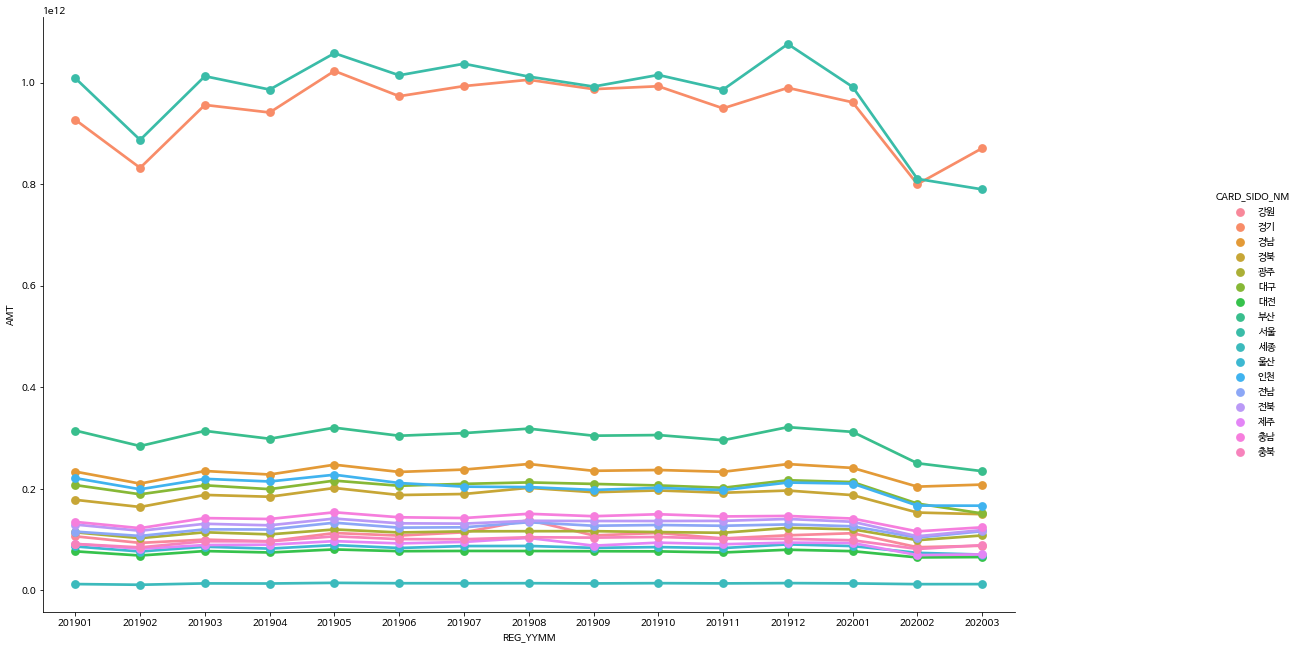

In [57]:
g = sns.catplot('REG_YYMM', 
                'AMT',
                hue='CARD_SIDO_NM',
                data=df2.reset_index(),
                kind='point')
g.fig.set_size_inches(20,10)

In [64]:
#!pip install squarify
import squarify

In [72]:
df3 = df[['STD_CLSS_NM', 'AMT']].groupby(['STD_CLSS_NM']).sum().reset_index()
df3['AMT'] = df3['AMT']/1000

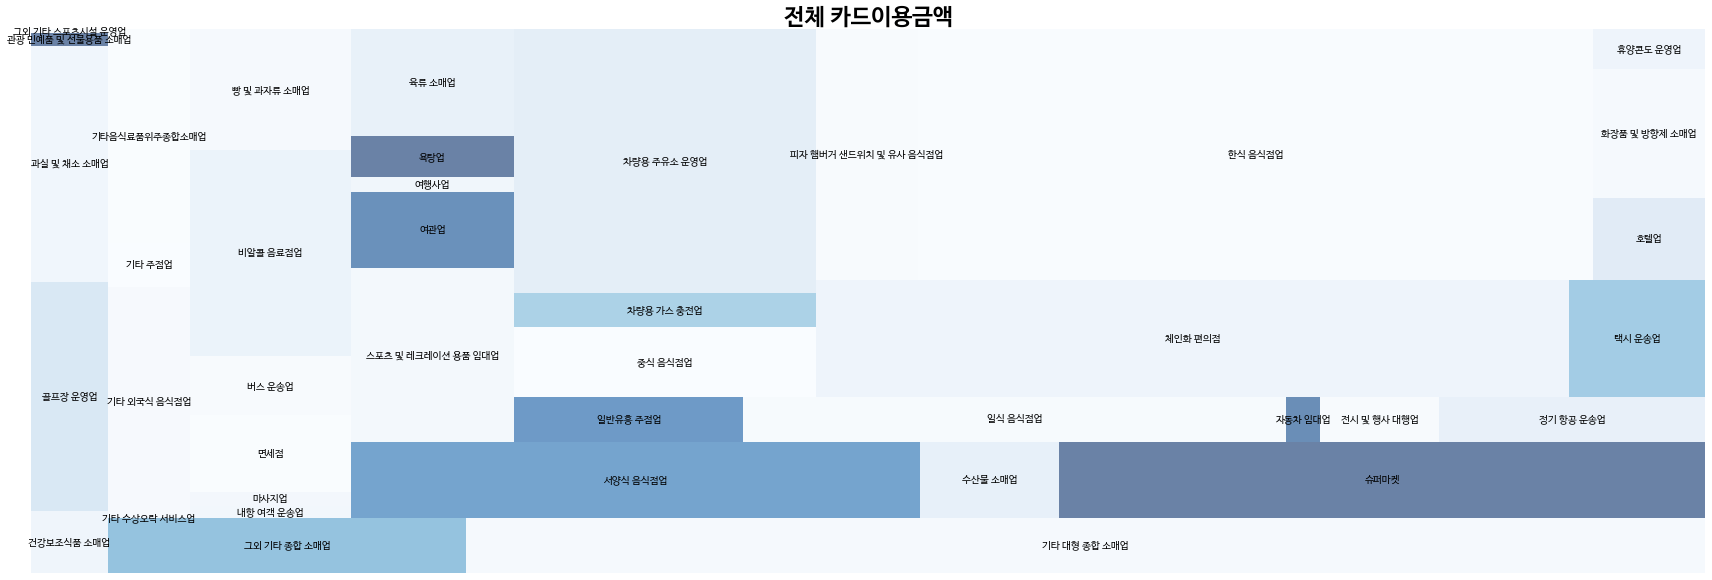

In [101]:
#Utilise matplotlib to scale our goal numbers between the min and max, then assign this scale to our values.
col = 'AMT'
target = 'STD_CLSS_NM'

norm = matplotlib.colors.Normalize(vmin=df3[col].min(), vmax=df3[col].max())
colors = [matplotlib.cm.Blues(norm(value)) for value in df[col]]

#Create our plot and resize it.
fig = plt.gcf()
fig.set_size_inches(30, 10)

#Use squarify to plot our data, label it and add colours. We add an alpha layer to ensure black labels show through
squarify.plot(label=df3[target],sizes=df3[col], color = colors, alpha=.6)
plt.title("전체 카드이용금액",fontsize=23,fontweight="bold")

#Remove our axes and display the plot
plt.axis('off')
plt.show()

<Figure size 432x288 with 0 Axes>

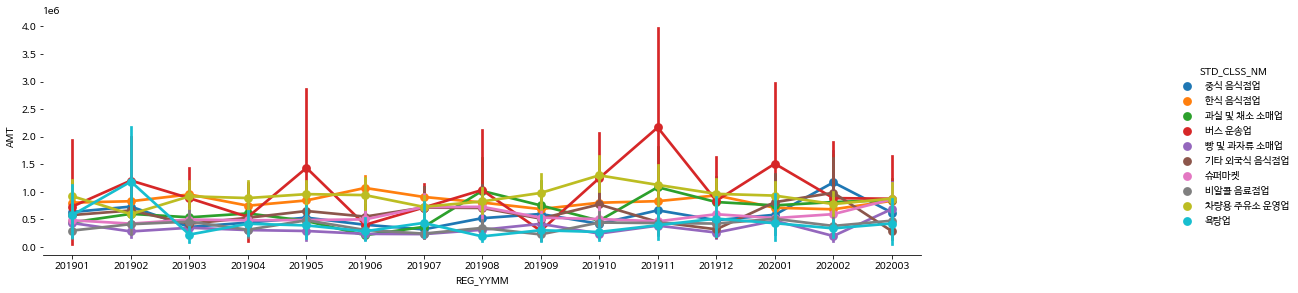

<Figure size 432x288 with 0 Axes>

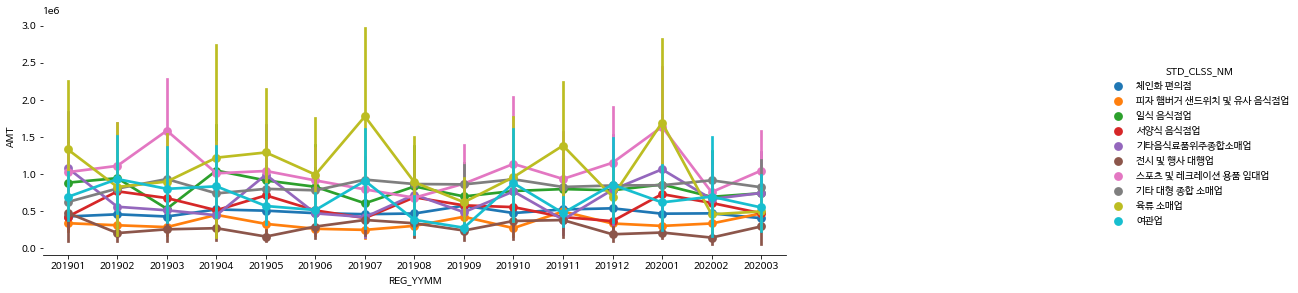

<Figure size 432x288 with 0 Axes>

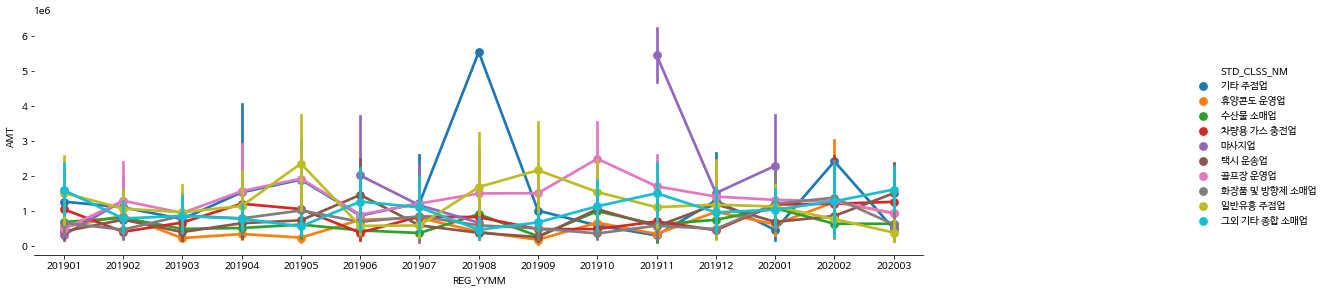

<Figure size 432x288 with 0 Axes>

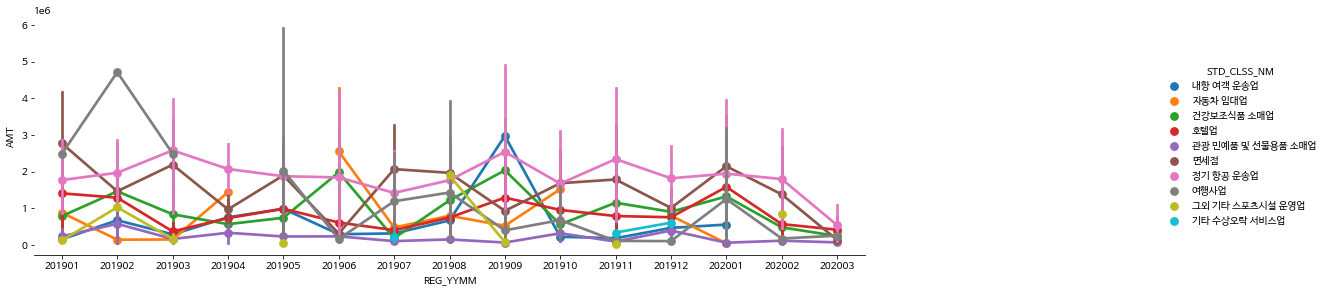

In [106]:
columns_ = df['STD_CLSS_NM'].unique()
len(columns_)

for i in range(4):
    plt.figure()
    df4 = df[df['STD_CLSS_NM'].isin(columns_[10*(i):10*(i+1)])]
    g = sns.catplot('REG_YYMM', 
                    'AMT',
                    hue='STD_CLSS_NM',
                    data=df4,
                    kind='point',
                    legend_out=True)
    g.fig.set_size_inches(20,4)
    g.despine(left=True)